<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png>

# CAP 421-3 - Deep Learning 
## Classes 01 and 02
### Image Processing

These notebook was part of Deep-Learning course provided by the [INPE](https://www.gov.br/inpe/pt-br) (Instituto Nacional de Pesquisas Espaciais) on his firt edition for the classes "Basics of Digital Image Processing. Convolution: Padding, Filter Dimension, Stride, Dilation." with Professero Tales.

This code is training for learning images. ;)

for: Luan Orion Baraúna

[https://github.com/barauna-lo](https://github.com/barauna-lo)

In [29]:
#Importin the image file
raster_filename = 'heliponto_2.tif'
!wget https://github.com/tkorting/remote-sensing-images/raw/master/{raster_filename} 

--2021-10-03 16:40:40--  https://github.com/tkorting/remote-sensing-images/raw/master/heliponto_2.tif
Resolvendo github.com (github.com)... 20.201.28.151
Conectando-se a github.com (github.com)|20.201.28.151|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 302 Found
Localização: https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_2.tif [redirecionando]
--2021-10-03 16:40:40--  https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_2.tif
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 122951 (120K) [image/tiff]
Salvando em: “heliponto_2.tif.11”

heliponto_2.tif.11  100%[===================>] 120,07K  --.-KB/s    em 0,1s    

2021-10-03 16:40:40 (980 KB/s) - “hel

In [30]:
#Import cv2 libary 
import cv2

opencv_matrix = cv2.imread(raster_filename, cv2.IMREAD_GRAYSCALE)

print(opencv_matrix.shape)
print(type(opencv_matrix))

(334, 359)
<class 'numpy.ndarray'>


In [31]:
# type(opencv_matrix)

In [32]:
try:
  import rasteirio as rio   
except:
  #rasteio is not installed by 
  #!pip install rasterio
  import rasterio as rio 

with rio.open(raster_filename) as rio_raster:
  rio_matrix = rio_raster.read(1)

  print(type(rio_raster))
  print(rio_matrix.shape)
  print(type(rio_matrix))

<class 'rasterio.io.DatasetReader'>
(334, 359)
<class 'numpy.ndarray'>


In [33]:
from osgeo import gdal

gdal_raster = gdal.Open(raster_filename, gdal.GA_ReadOnly)
gdal_band = gdal_raster.GetRasterBand(1)
gdal_matrix = gdal_band.ReadAsArray()

print(type(gdal_raster))
print(gdal_matrix.shape)
print(type(gdal_matrix)) 

<class 'osgeo.gdal.Dataset'>
(334, 359)
<class 'numpy.ndarray'>


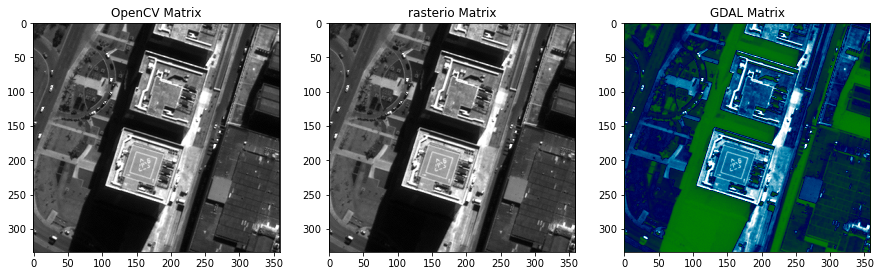

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 35))

plt.subplot(131)
plt.imshow(opencv_matrix, cmap = 'gray')
plt.title('OpenCV Matrix')

plt.subplot(132)
plt.imshow(rio_matrix, cmap = 'gray')
plt.title('rasterio Matrix')

#testing new color 
plt.subplot(133)
plt.imshow(gdal_matrix, cmap = 'ocean')
plt.title('GDAL Matrix')

plt.show() 

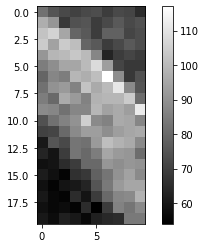

[[ 82  75  72  70  72  73  69  72  71  65]
 [ 97  91  68  74  75  69  72  76  72  74]
 [102 106  95  79  76  69  78  78  71  73]
 [104  94 104 101  79  76  69  72  76  73]
 [ 91  99 100 103 100  87  63  69  71  69]
 [ 85  89  95  95 100 108  93  71  68  68]
 [ 79  87  85  99  97 101 117  89  68  74]
 [ 82  90  92  86 102  96 100 111  88  75]
 [ 85  80  96  92  86  98  99  99 104  81]
 [ 88  87  82  87  87  99  94  96  93 112]
 [ 74  82  86  90 105  88  86  96  95  87]
 [ 70  71  80  88  93  93  89  93  95  96]
 [ 60  75  72  83  82  92 101  98  96  88]
 [ 63  59  69  83  80  85  95  92  91  81]
 [ 58  59  65  69  80  80  91  89  91  90]
 [ 61  58  55  66  68  78  83  90  94  88]
 [ 58  55  59  60  63  75  84  92  95  95]
 [ 60  56  55  65  59  69  80  87  88  98]
 [ 58  56  57  55  65  54  69  86  83  88]
 [ 60  57  62  60  56  62  64  65  84  84]]


In [35]:
#Printing a peace of the chart
block_matrix = rio_matrix[20:40, 15:25]

plt.figure()
plt.imshow(block_matrix, cmap = 'gray')#,vmin=0, vmax=70)
plt.colorbar()
plt.show()

print(block_matrix)

# Spatial filtering

https://www.youtube.com/embed/hRtmSh2gF48?start=42

<center><iframe width="800" height="500" src="https://www.youtube.com/embed/hRtmSh2gF48?start=42" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>

# Exercise 1

Create a convolution kernel called `average_kernel` as a `numpy array` with the following parameters:
* width: 15
* height: 15
* weights: all values equal to 1 / (15 * 15) or `~0.00444`

then apply it to `raster_filename`.

Display, using `matplotlib`, the input (`rio_matrix`) and output (`conv_matrix`) images.

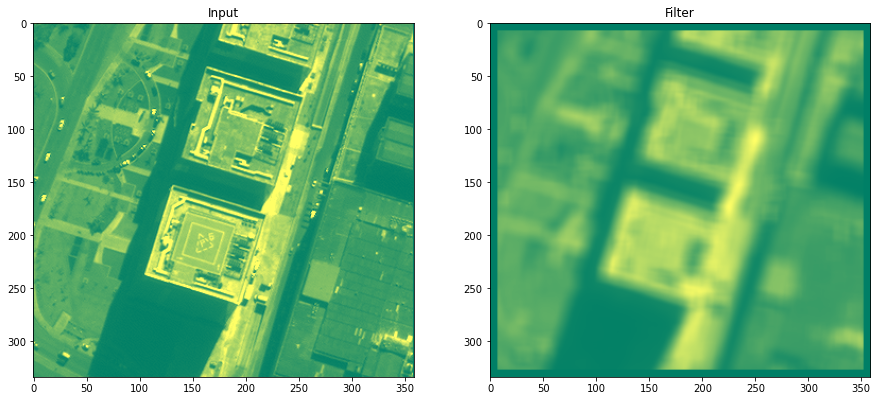

In [50]:
import numpy as np

#Inicial Parametes 
width = 15
height = 15
weigth = 1/(15*15)

# Creating a midpoint
width_mean  = int( width/2)
height_mean = int(height/2) 

leng = width*height            #lenth of width vector
new_matrix = rio_matrix.copy() #The matrix we use subtitution 
rows   = new_matrix.shape[0]   #lent os rows
coluns = new_matrix.shape[1]   #lent of colluns

#Creating a The Avarege Kernel
avarege_kernel = (np.ones((width,height)))*weigth #creatind a matrix with 1 ones
  
#Creating a Empty Matrix     
conv_matrix=[]
conv_matrix= np.zeros_like(new_matrix)

for i in range(height_mean,rows-height_mean):
    for j in range(width_mean,coluns-width_mean):
        box_matrix = new_matrix[i-height_mean : i + height_mean +1 , 
                                j-width_mean  : j + width_mean  +1]
        conv_matrix[i,j] = np.dot(box_matrix.flatten(),avarege_kernel.flatten())

#Ploting        
plt.figure(figsize=(15,35))
plt.subplot(121)
plt.imshow(rio_matrix, cmap = 'summer')#,vmin=0, vmax=100)
plt.title('Input')

plt.subplot(122)
plt.imshow(conv_matrix, cmap= 'summer')
plt.title('Filter')

plt.show()


# Exercice 1
## No-Padding effect

Here we solve the Pading problem by creating a condition for the size of the box_matrix. Unlike adding columns with zeros or ones, with this logic the kernal will not perform the multiplication with false weights. In this way, only the points that are in the vicinity of the central pixel will be taken into account. If it does not exist, it will not be taken into account.

For that, I defined four functions that will delimit the existence condition and limit the box size.

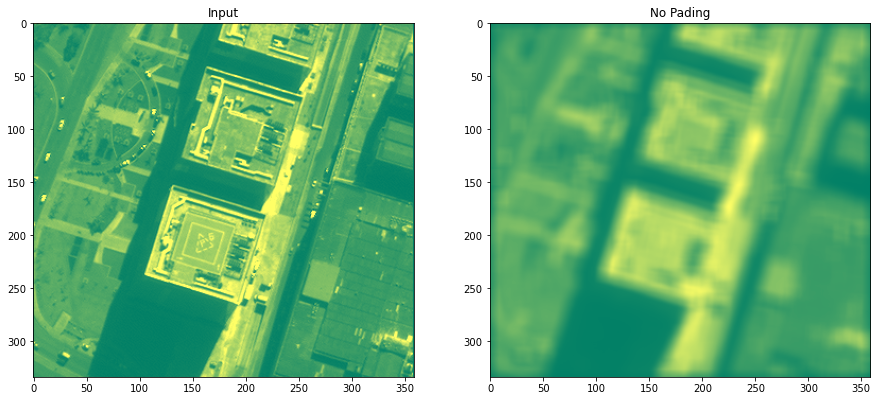

In [52]:
import numpy as np

#Inicial Parametes 
width  = 15
height = 15
weigth = 1/(15*15)

# Creating a midpoint
width_mean  = int( width/2)
height_mean = int(height/2) 

leng = width*height            #lenth of width vector
new_matrix = rio_matrix.copy() #The matrix we use subtitution 
rows   = new_matrix.shape[0]   #lent os rows
coluns = new_matrix.shape[1]   #lent of colluns

#Creating a variable size for the box_matrix
def lower_width(x):  return 0 if x < width_mean else x - width_mean
def upper_width(x):  return x + width_mean +1 if x < rows-width_mean else rows
def lower_height(x): return 0 if x < height_mean else x - height_mean
def upper_height(x): return x +height_mean +1 if x < coluns-height_mean else coluns 

#Creating a Empty Matrix     
conv_matrix=[]
conv_matrix= np.zeros_like(new_matrix)

#Defining 
for i in range(rows):
    for j in range(coluns):
        box_matrix = new_matrix[lower_width(i)  : upper_width(i) , 
                                lower_height(j) : upper_height(j)]
        avarege_kernel = np.ones((box_matrix.shape[0],box_matrix.shape[1]))*weigth #creating the kernel 
        conv_matrix[i,j] =  np.dot(box_matrix.flatten(),avarege_kernel.flatten())  #alocating the conv_matrix

#Plotting        
plt.figure(figsize=(15,35))
plt.subplot(121)
plt.imshow(rio_matrix, cmap = 'summer')#,vmin=0, vmax=100)
plt.title('Input')

plt.subplot(122)
plt.imshow(conv_matrix, cmap= 'summer')
plt.title('No Pading')

plt.show()


# Exercise 2
Using the same convolution kernel defined in the previous exercise, apply it to `raster_filename` using a stride of 5.

Display, using `matplotlib` input (`rio_matrix`) and output (`conv_matrix_stride`) images.

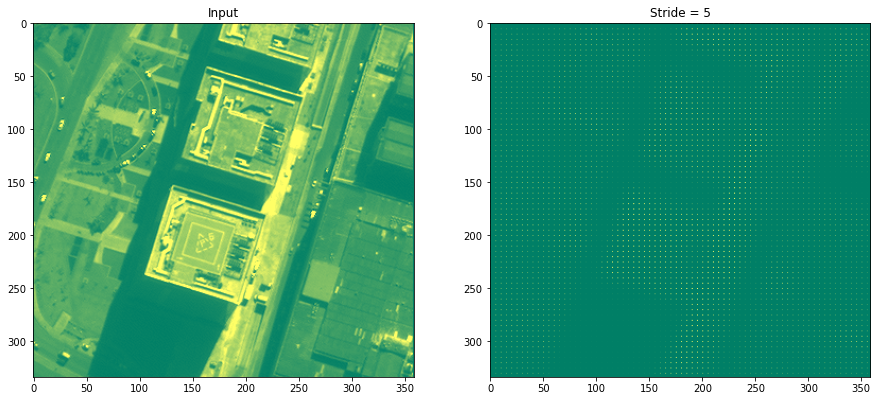

In [54]:
import numpy as np

#Inicial Parametes 
width  = 15
height = 15
weigth = 1/(15*15)

# Creating a midpoint
width_mean  = int( width/2)
height_mean = int(height/2) 

leng = width*height            #lenth of width vector
new_matrix = rio_matrix.copy() #The matrix we use subtitution 
rows   = new_matrix.shape[0]   #lent os rows
coluns = new_matrix.shape[1]   #lent of colluns

#Creating a variable size for the box_matrix
def lower_width(x):  return 0 if x < width_mean else x - width_mean
def upper_width(x):  return x + width_mean +1 if x < rows-width_mean else rows
def lower_height(x): return 0 if x < height_mean else x - height_mean
def upper_height(x): return x +height_mean +1 if x < coluns-height_mean else coluns 

#Creating a Empty Matrix     
conv_matrix=[]
conv_matrix= np.zeros_like(new_matrix)

#The Stride parameter
stride = 5

#Defining 
for i in range(0,rows,stride):
    for j in range(0,coluns,stride):
        box_matrix = new_matrix[lower_width(i)  : upper_width(i) , 
                                lower_height(j) : upper_height(j)]
        avarege_kernel = np.ones((box_matrix.shape[0],box_matrix.shape[1]))*weigth #creating the kernel 
        conv_matrix_stride[i,j] =  np.dot(box_matrix.flatten(),avarege_kernel.flatten())  #alocating the conv_m

#Ploting
plt.figure(figsize=(15,35))
plt.subplot(121)
plt.imshow(rio_matrix, cmap = 'summer')#,vmin=0, vmax=100)
plt.title('Input')

plt.subplot(122)
plt.imshow(conv_matrix_stride, cmap= 'summer')
plt.title('Stride = '+str(stride))

plt.show()


# Exercise 3

Create a convolution kernel called `high_pass_kernel` as a `numpy array` with the following weights:

```
-1 -1 -1 -1 -1
 2  2  2 -1 -1
-1  2  2  2 -1
-1 -1 -1  2  2
-1 -1 -1 -1 -1
```

then apply it to `raster_filename`.

Display, using `matplotlib`, the input (`rio_matrix`) image, the output (`conv_matrix`) image, and the kernel.

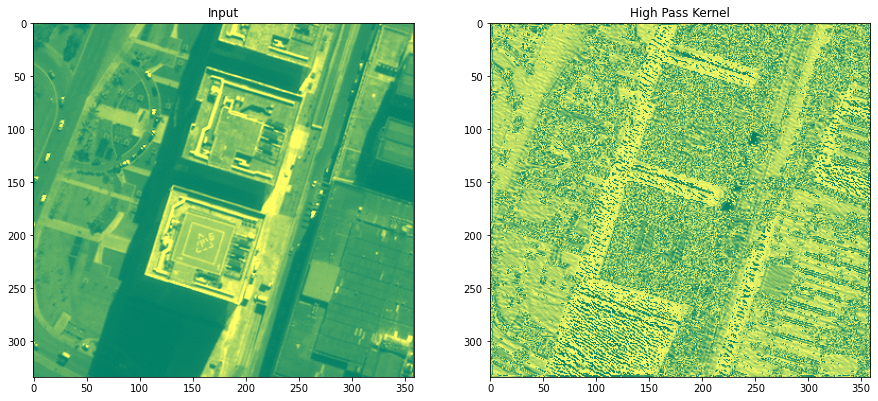

In [57]:
import numpy as np

# Control Parameners
#defining the kernel
high_pass_kernel = np.array([ 
[-1, -1, -1, -1, -1],
[ 2,  2,  2, -1, -1],
[-1,  2,  2,  2, -1],
[-1, -1, -1,  2,  2],
[-1, -1, -1, -1, -1]])

stride = 1

color = 'summer'

kernel = high_pass_kernel

##############################################

#Inicial Parametes 
width  = kernel.shape[0]
height = kernel.shape[1]
#weigth = 1/(15*15)

# Creating a the size of the box
# Creating a midpoint
width_mean  = int( width/2)
height_mean = int(height/2) 

leng = width*height            #lenth of width vector
new_matrix = rio_matrix.copy() #The matrix we use subtitution 
rows   = new_matrix.shape[0]   #lent os rows
coluns = new_matrix.shape[1]   #lent of colluns

#Creating a variable size for the box_matrix
def lower_width(x):  return 0 if x < width_mean else x - width_mean
def upper_width(x):  return x + width_mean +1 if x < rows-width_mean else rows
def lower_height(x): return 0 if x < height_mean else x - height_mean
def upper_height(x): return x +height_mean +1 if x < coluns-height_mean else coluns 
    
#Creating a "empyty matrix"
conv_matrix = []
conv_matrix = np.zeros_like(new_matrix)

#Defining 
for i in range(0,rows,stride):
    for j in range(0,coluns,stride):
        box_matrix = new_matrix[lower_width(i)  : upper_width(i) , 
                                lower_height(j) : upper_height(j)]
        new_kernel_matrix =  kernel[0:box_matrix.shape[0],0:box_matrix.shape[1]]
        conv_matrix[i,j] =  np.dot(box_matrix.flatten(),new_kernel_matrix.flatten())

#Ploting
plt.figure(figsize=(15,35))
plt.subplot(121)
plt.imshow(rio_matrix, cmap = color)#,vmin=0, vmax=100)
plt.title('Input')

plt.subplot(122)
plt.imshow(conv_matrix, cmap= color)
plt.title('High Pass Kernel')

plt.show()


# Exercise 4

Apply a $3 \times 3$ kernel filled with 1's, with two different operations: the first with dilation, and the second with erosion.

Display, using `matplotlib` input (`rio_matrix`) and output (`dilation_matrix` and `erosion_matrix`) images.

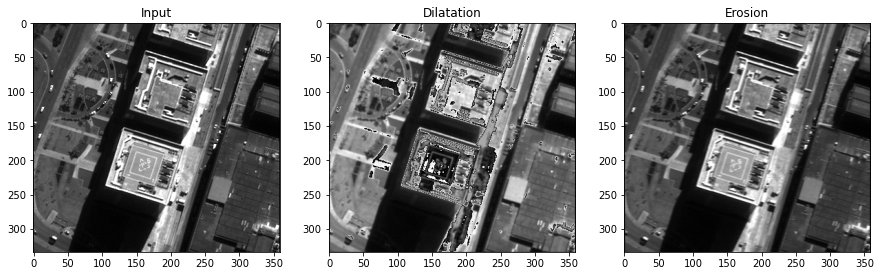

In [40]:
import numpy as np

# Control Parameners
#defining the kernel
dilatarion_matrix = np.array([ 
[0, 1, 0],
[1, 1, 1],
[0, 1, 0]])

erosion_matrix = np.array([ 
[1, 1, 1],
[0, 0, 0],
[0, 0, 0],
])

one_kernels = np.ones((3,3))

stride = 1

color = 'gray'

kernel = dilatarion_matrix/len(dilatarion_matrix)

##############################################

#Inicial Parametes 
width  = kernel.shape[0]
height = kernel.shape[1]
weigth = 1/(15*15)

# Creating a the size of the box
width_mean  = int( width/2)
height_mean = int(height/2) 

#Matrix for substituition
new_matrix  = rio_matrix.copy() 

leng        = width*height #lenth of width vector
rows        = new_matrix.shape[0] #lent os rows
coluns      = new_matrix.shape[1] #lent of colluns

#Creating a variable size for the box_matrix
def lower_width(x):  return 0 if x < width_mean else x - width_mean
def upper_width(x):  return x + width_mean +1 if x < rows-width_mean else rows
def lower_height(x): return 0 if x < height_mean else x - height_mean
def upper_height(x): return x +height_mean +1 if x < coluns-height_mean else coluns 

#Creating a "empyty matrix"
conv_matrix = []
conv_matrix = np.zeros_like(new_matrix)

#Defining 
for i in range(0,rows,stride):
    for j in range(0,coluns,stride):
        box_matrix = new_matrix[lower_width(i)  : upper_width(i) , 
                                lower_height(j) : upper_height(j)]
        new_kernel_matrix =  kernel[0:box_matrix.shape[0],0:box_matrix.shape[1]]
        conv_matrix[i,j] =  np.dot(box_matrix.flatten(),new_kernel_matrix.flatten())

##################

kernel = erosion_matrix/len(erosion_matrix)
#Creating a "empyty matrix"
conv_matrix2 = []
conv_matrix2 = np.zeros_like(new_matrix)
#Second Kernel        
for i in range(0,rows,stride):
    for j in range(0,coluns,stride):
        box_matrix = new_matrix[lower_width(i)  : upper_width(i) , 
                                lower_height(j) : upper_height(j)]
        new_kernel_matrix =  kernel[0:box_matrix.shape[0],0:box_matrix.shape[1]]
        conv_matrix2[i,j] =  np.dot(box_matrix.flatten(),new_kernel_matrix.flatten())

#Ploting
plt.figure(figsize=(15,35))
plt.subplot(131)
plt.imshow(rio_matrix, cmap = color)#,vmin=0, vmax=100)
plt.title('Input')

plt.subplot(132)
plt.imshow(conv_matrix, cmap= color)
plt.title('Dilatation')

plt.subplot(133)
plt.imshow(conv_matrix2, cmap= color)
plt.title('Erosion')

plt.show()


In [41]:
dilatarion_matrix*weigth

array([[0.        , 0.00444444, 0.        ],
       [0.00444444, 0.00444444, 0.00444444],
       [0.        , 0.00444444, 0.        ]])

# BONUS

Here a will test some filters finded in [wikipedia.org/Kernel_(image_processing)](https://en.wikipedia.org/wiki/Kernel_(image_processing))

In [103]:
import numpy as np

Identiy = np.array([ 
[0, 0, 0],
[0, 1, 0],
[0, 0, 0]])

Edge_detection1 = np.array([ 
[1, 0, -1],
[0, 0, 0],
[-1, 0, 1],
])

Edge_detection2 = np.array([ 
[0, -1, 0],
[-1, 4, -1],
[0, -1, 0],
])

Edge_detection3 = np.array([ 
[-1, -1, -1],
[-1, 8, -1],
[-1, -1, -1],
])

Sharpen = np.array([ 
[0 , -1, 0],
[-1, 5, -1],
[0 , -1, 0],
])

Box_blur = (np.array([ 
[0 , -1, 0],
[-1, 5, -1],
[0 , -1, 0],
]))/9

Gaussian_blur3x3 = (np.array([ 
[1 , 2, 1],
[2, 4, 2],
[1 , 2, 1],
]))/16

Gaussian_blur5x5 = (np.array([ 
[1,4,6,4,1],
[4,16,24,16,4],
[6,24,36,24,6],
[4,16,24,16,4],
[1,4,5,4,1]]))/256

filters = [
Identiy,
Edge_detection1,
Edge_detection2,
Edge_detection3,
Sharpen,
Box_blur,
Gaussian_blur3x3,
Gaussian_blur5x5,
] 

filters_title = [
'Identiy',
'Edge Detection1',
'Edge Detection2',
'Edge Detection3',
'Sharpen',
'Box Blur',
'Gaussian Blur3x3',
'Gaussian Blur5x5',
] 

In [64]:
# THE CONV_MARIX FUNCTION
def conv_matrix(stride,kernel):
    kernel = kernel/len(kernel)
    #Inicial Parametes 
    width  = kernel.shape[0]
    height = kernel.shape[1]
    weigth = 1/(15*15)

    # Creating a the size of the box
    width_mean  = int( width/2)
    height_mean = int(height/2) 

    #Matrix for substituition
    new_matrix  = rio_matrix.copy() 

    leng        = width*height #lenth of width vector
    rows        = new_matrix.shape[0] #lent os rows
    coluns      = new_matrix.shape[1] #lent of colluns

    #Creating a variable size for the box_matrix
    def lower_width(x):  return 0 if x < width_mean else x - width_mean
    def upper_width(x):  return x + width_mean +1 if x < rows-width_mean else rows
    def lower_height(x): return 0 if x < height_mean else x - height_mean
    def upper_height(x): return x +height_mean +1 if x < coluns-height_mean else coluns 

    #Creating a "empyty matrix"
    conv_matrix = []
    conv_matrix = np.zeros_like(new_matrix)

    #Defining 
    for i in range(0,rows,stride):
        for j in range(0,coluns,stride):
            box_matrix = new_matrix[lower_width(i)  : upper_width(i) , 
                                    lower_height(j) : upper_height(j)]
            new_kernel_matrix =  kernel[0:box_matrix.shape[0],0:box_matrix.shape[1]]
            conv_matrix[i,j] =  np.dot(box_matrix.flatten(),new_kernel_matrix.flatten())
    return conv_matrix

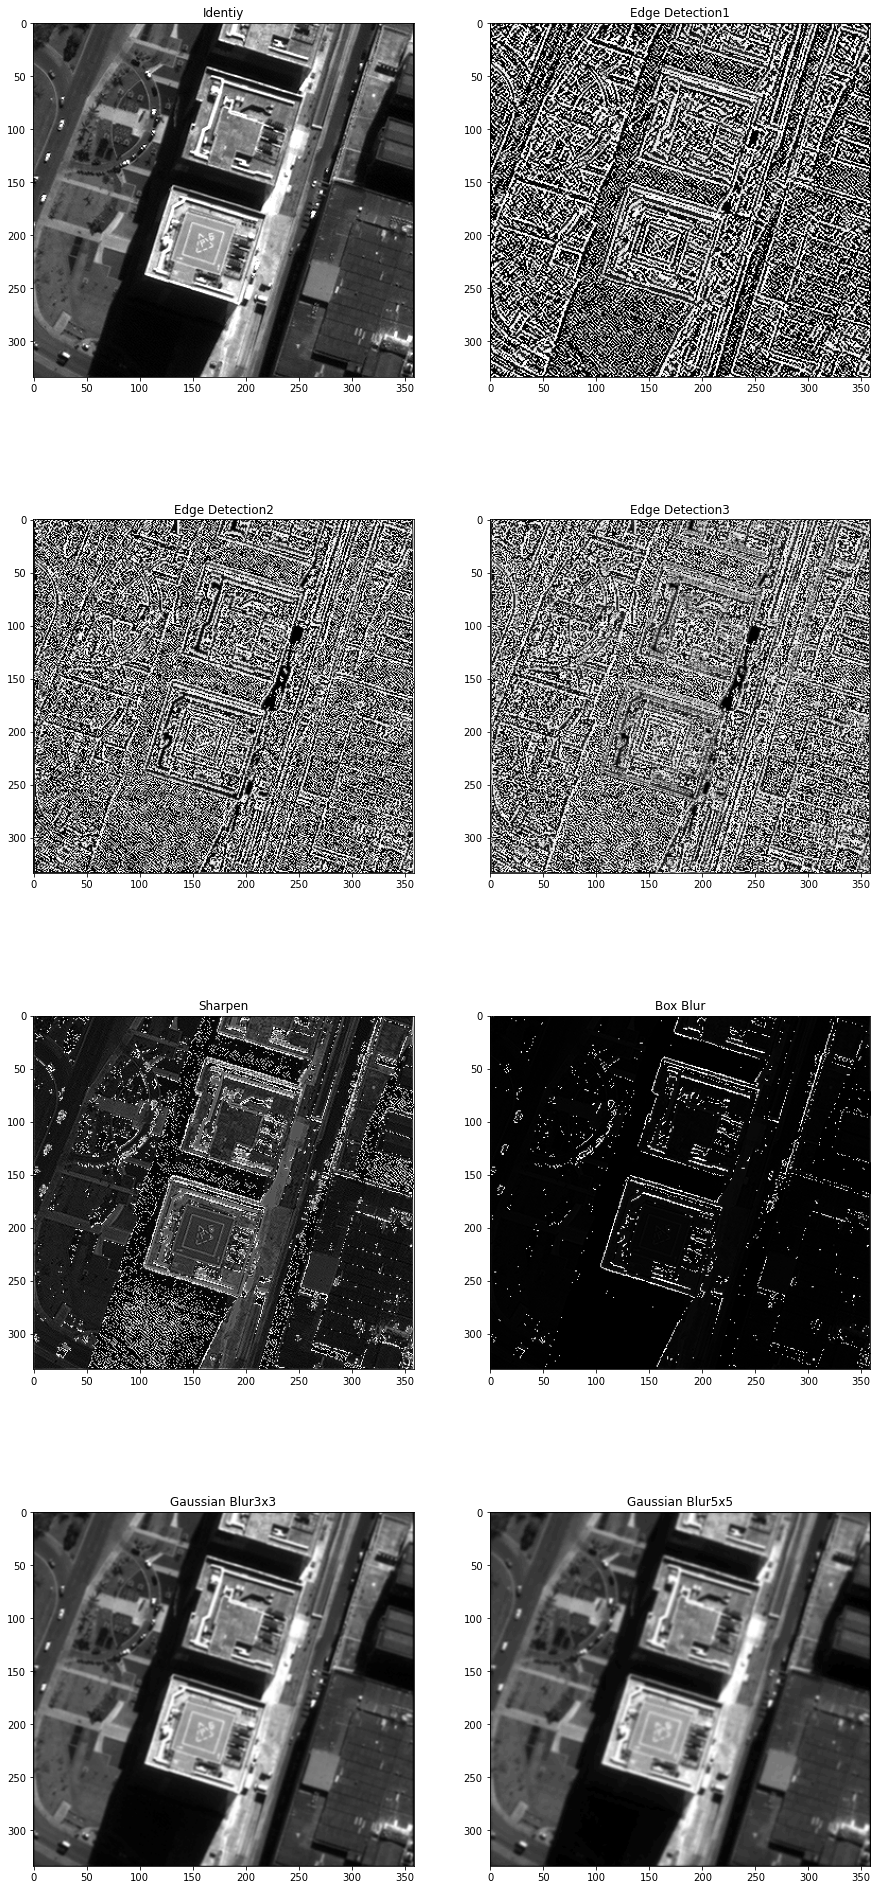

In [102]:
#conv_matrix(1,one_kernels)
plt.figure(figsize=(15,35))
for i in range(len(filters)):
    plt.subplot(4,2,i+1)
    plt.imshow(conv_matrix(1,filters[i]), cmap = 'gray')#,vmin=0, vmax=100)
    plt.title(str(filters_title[i]))
plt.show()